In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import idx2numpy
import gzip

2023-01-20 00:14:26.768889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 00:14:27.029793: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 00:14:27.029813: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 00:14:27.828423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
## Opens images and labels and converts the files to numpy arrays
train_images = idx2numpy.convert_from_file(gzip.open('./data/train-images-idx3-ubyte.gz','r'))
train_labels = idx2numpy.convert_from_file(gzip.open('./data/train-labels-idx1-ubyte.gz','r'))
test_images = idx2numpy.convert_from_file(gzip.open('./data/t10k-images-idx3-ubyte.gz','r'))
test_labels = idx2numpy.convert_from_file(gzip.open('./data/t10k-labels-idx1-ubyte.gz','r'))

5


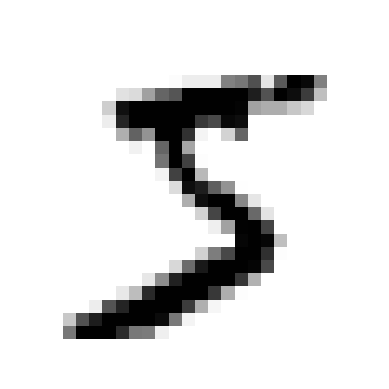

In [3]:
## Prints the first image and label to show that it was loaded correctly
plt.axis('off')
plt.imshow(train_images[0], cmap=plt.cm.binary)
print(train_labels[0])

In [4]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(rate=0.01),
    tf.keras.layers.Dense(10),
])

2023-01-20 00:14:29.828632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 00:14:29.828870: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 00:14:29.829008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-20 00:14:29.829128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-20 00:14:29.829279: W tensorflow/c

In [6]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [7]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2241 - sparse_categorical_accuracy: 0.8403
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3521 - sparse_categorical_accuracy: 0.9038
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3072 - sparse_categorical_accuracy: 0.9142
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2760 - sparse_categorical_accuracy: 0.9239
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2669 - sparse_categorical_accuracy: 0.9278
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2733 - sparse_categorical_accuracy: 0.9261
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402 - sparse_categorical_accuracy: 0.9364
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2265 - sparse_categorical_accuracy: 0.9376
Epoch 9/20
1875/1875 [==========

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 725us/step - loss: 0.1310 - sparse_categorical_accuracy: 0.9668
Test loss: 0.13100707530975342
Test accuracy: 0.9667999744415283


In [9]:
test_predictions = np.argmax(model.predict(test_images), axis=1)

313/313 [==============================] - 0s 643us/step


In [10]:
def draw_images(images, titles, rows=4, cols=10):
    figure, axis = plt.subplots(rows, cols)

    scale = 1.5
    figure.set_size_inches(cols*scale, rows*scale)
    images_length = len(images)

    index = 0
    for i in range(rows):
        for j in range(cols):
            axis[i, j].axis('off')
            axis[i, j].imshow(images[index], cmap=plt.cm.binary)
            axis[i, j].set_title(f"{titles[index]}")
            index += 1
            if index >= images_length:
                return

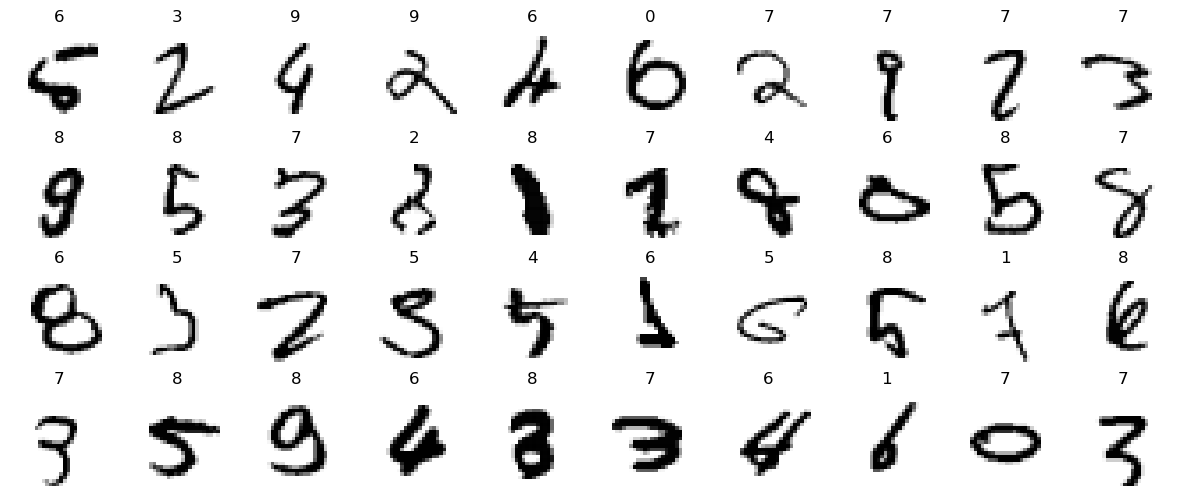

In [11]:
## Draws the images that it got wrong when predicting
wrong_predictions_indices = np.where(test_predictions != test_labels)[0]

wrong_images = test_images[wrong_predictions_indices]
wrong_predictions = test_predictions[wrong_predictions_indices]
correct_labels = test_labels[wrong_predictions_indices]

draw_images(images=wrong_images, titles=wrong_predictions)